###  Objectives

1. Point Operations
2. Neighborhood Operation
3. Geometric Operation



## Preparations

In [0]:
# Import libraries
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
# set inline plots size
plt.rcParams["figure.figsize"] = (15, 7) # (w, h)
import numpy as np
import cv2

### Download images

In [0]:
!wget "https://images.pexels.com/photos/1784289/pexels-photo-1784289.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" -O cat.jpg
!wget "https://images.pexels.com/photos/1208783/pexels-photo-1208783.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" -O city.jpg
!wget "https://drive.google.com/uc?export=view&id=121kl8unhgoIsgamR0QXU57l7Eb7A74nb" -O check.jpg
!wget "https://drive.google.com/uc?export=view&id=1NkTZkMebeZ-eYNsHBusfi7_fqYWWv2uE" -O motion_blur.png

--2019-08-29 05:50:37--  https://images.pexels.com/photos/1784289/pexels-photo-1784289.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260
Resolving images.pexels.com (images.pexels.com)... 104.17.209.102, 104.17.208.102, 2606:4700::6811:d166, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.209.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110014 (107K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 107.44K  --.-KB/s    in 0.007s  

2019-08-29 05:50:37 (14.4 MB/s) - ‘cat.jpg’ saved [110014/110014]

--2019-08-29 05:50:38--  https://images.pexels.com/photos/1208783/pexels-photo-1208783.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260
Resolving images.pexels.com (images.pexels.com)... 104.17.209.102, 104.17.208.102, 2606:4700::6811:d166, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.209.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250055 (244K) [image/jpeg]
Sa

### Checkout downloaded images

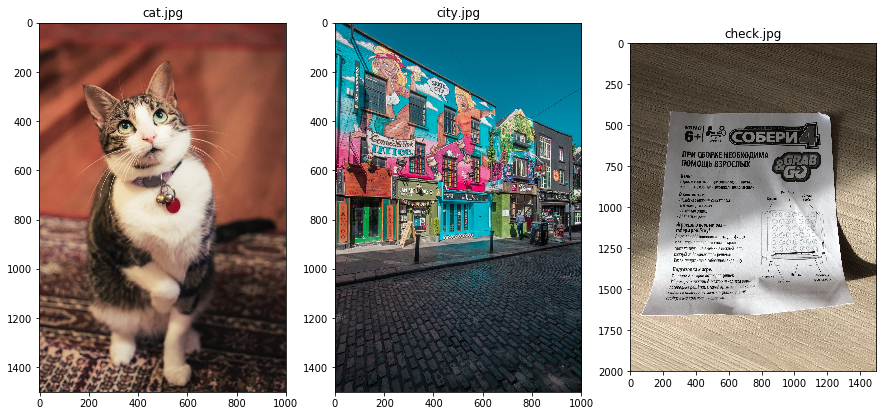

In [0]:
cat_bgr = cv2.imread("cat.jpg", cv2.IMREAD_COLOR)
cat_gray = cv2.cvtColor(cat_bgr, cv2.COLOR_BGR2GRAY) 
cat_rgb = cv2.cvtColor(cat_bgr, cv2.COLOR_BGR2RGB)

city_bgr = cv2.imread("city.jpg", cv2.IMREAD_COLOR)
city_gray = cv2.cvtColor(city_bgr, cv2.COLOR_BGR2GRAY)
city_rgb = cv2.cvtColor(city_bgr, cv2.COLOR_BGR2RGB)

check_bgr = cv2.imread("check.jpg", cv2.IMREAD_COLOR)
check_gray = cv2.cvtColor(check_bgr, cv2.COLOR_BGR2GRAY)
check_rgb = cv2.cvtColor(check_bgr, cv2.COLOR_BGR2RGB)

# Matplotlib allows you display images in row
# yout need to generate subplot
# plt.subplot(number_of_rows, number_of_columns, idx)
subplot = plt.subplot(1, 3, 1)
subplot.set_title("cat.jpg")
subplot.imshow(cat_rgb)


subplot = plt.subplot(1, 3, 2)
subplot.set_title("city.jpg")
subplot.imshow(city_rgb)


subplot = plt.subplot(1, 3, 3)
subplot.set_title("check.jpg")
subplot.imshow(check_rgb)

# after subplot prepared just call plt.show()
plt.show()

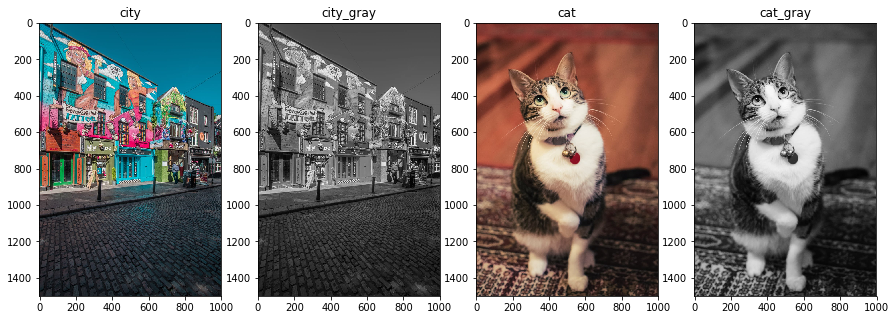

In [0]:
# let's make our live easier
def showInRow(list_of_images, titles = None):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
  plt.show()
  
  
showInRow([city_rgb, city_gray, cat_rgb, cat_gray], ['city', 'city_gray', 'cat', 'cat_gray'])

## Point operations
Point operations is performed for each pixel separetly

![alt text](https://drive.google.com/uc?export=view&id=1IpvyAX-OnRD3pdQmCCK0qZMoZOA5GZe2)

One of the simples operation is make image negative.

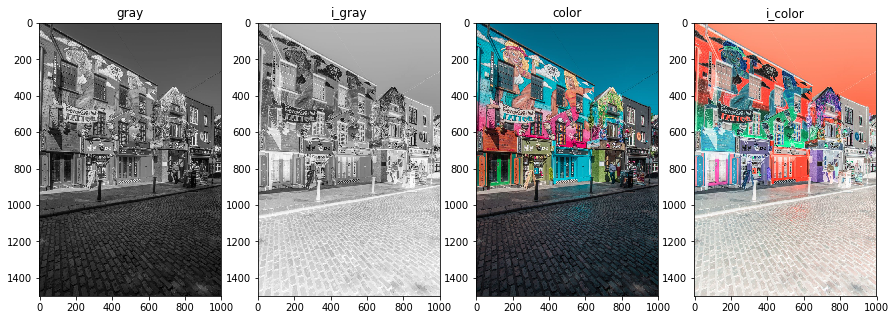

In [0]:
# in grayscale
city_gray_inversed = 255 - city_gray


# in rgb
img_r,img_g,img_b = cv2.split(city_rgb)
negative_r = abs(255-img_r)
negative_g = abs(255-img_g)
negative_b = abs(255-img_b)
negative_rgb = cv2.merge((negative_r,negative_g,negative_b))


showInRow([city_gray, city_gray_inversed, city_rgb, negative_rgb], ["gray", "i_gray", "color", "i_color"])

### Exercise
Inverse blue channel by yourself

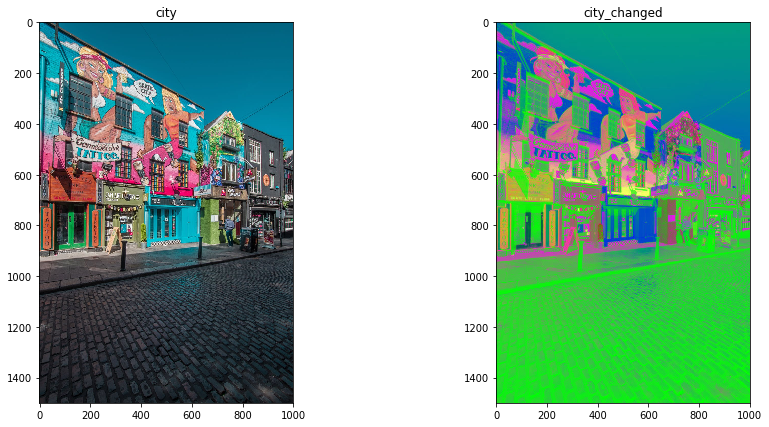

In [0]:
city_rgb_changed = city_rgb.copy()
city_rgb_changed[:,:,1] = 255 - city_rgb_changed[:,:,1] # TODO

showInRow([city_rgb, city_rgb_changed], ["city", "city_changed"])

### Vignetting (exercise)
![alt text](https://www.daz3d.com/galleryimage/image/591321/scenic-outpost-vignetting-and-dirt_full.jpg)

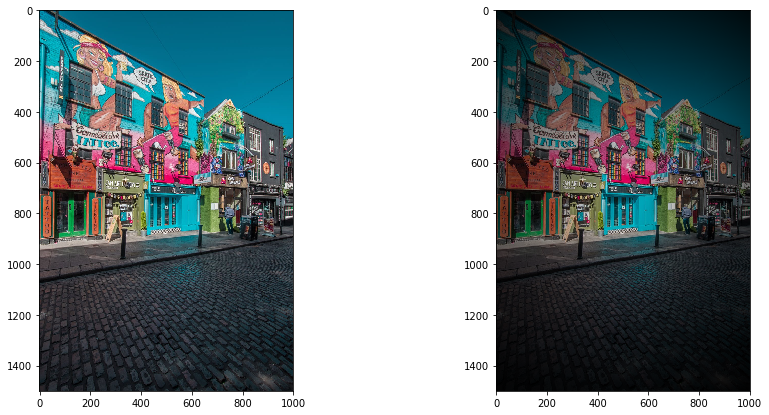

In [0]:
def vignetting(img, decay = 0.9):
  result_img = img.copy()
  center = (img.shape[0] / 2.0, img.shape[1] / 2.0)
  max_dist = (center[0]**2 + center[1]**2) ** 0.5
  for r in range(img.shape[0]):
    for c in range(img.shape[1]):
      dist = ((r - center[0])**2 + (c - center[1])**2) ** 0.5
      decay_val = 1.0 - (decay * dist / max_dist)
      result_img[r, c] = result_img[r, c] * decay_val
  return result_img

showInRow([city_rgb, vignetting(city_rgb)])


# try change '** 0.5' -> '** 1.4' in distance calculations
# vignetting works not in linear way

## Neighborhood Operation

Neighborhood operations is performed for closest group of pixels.

![alt text](https://drive.google.com/uc?export=view&id=1KNpBAHvE9OujRMWLUR0gnHgoR5KUG1Cc)

### Noise reduction

In [0]:
# function to add noise on image 
# code taken from (https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv)
def noisy(image,noise_type,amount = 0.04, s_vs_p = 0.5, mean = 0, var = 0.1):
   if noise_type == "gauss":
      row,col,ch= image.shape
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_type == "s&p":
      row,col,ch = image.shape
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


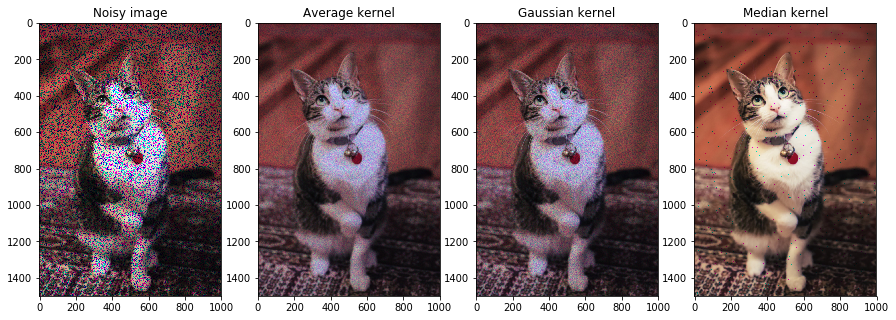

In [0]:
# generate noisy image
img_noise = noisy(cat_rgb,'s&p',0.2)
average_kernel = cv2.blur(img_noise,(5,5))
gaussian_kernel = cv2.GaussianBlur(img_noise,(5,5),0)
median_kernel = cv2.medianBlur(img_noise,5)

showInRow([img_noise, average_kernel, gaussian_kernel, median_kernel], 
          ["Noisy image", "Average kernel", "Gaussian kernel", "Median kernel"])

![How median filter works](https://cdn-images-1.medium.com/max/1600/1*VyzJxDrLrC-OqkV5LHhjQQ.gif)

**Exercise**

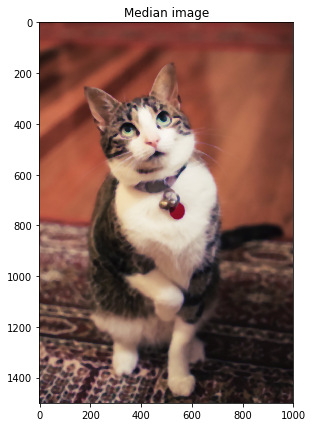

In [0]:
# write your own median filter using numpy

def median_filter(image, kernel_size=9):
  h,w,c = image.shape
  image_filtered = np.zeros((h,w,c), dtype=np.int)
  kernel_step = kernel_size//2 + 1 # step to left and right from kernel center
  for k in range(c):
    for i in range(w):
        for j in range(h):
          x_min = i-kernel_step if i-kernel_step > 0 else 0 
          x_max = i+kernel_step if i+kernel_step < w-1 else w-1
          y_min = j-kernel_step if j-kernel_step > 0 else 0 
          y_max = j+kernel_step if j+kernel_step < h-1 else h-1 
          curr_array = image[y_min:y_max,x_min:x_max,k]
          sorted_array = curr_array.flatten()
          sorted_array.sort()
          idx = sorted_array.shape[0]//2 if sorted_array.shape[0] % 2 !=0 else sorted_array.shape[0]//2 + 1
          image_filtered[j,i,k] = sorted_array[idx]
          
  return image_filtered
  
  
img_median = median_filter(img_noise)
plt.imshow(img_median)
plt.title('Median image')
plt.show()

### Kernel Operations
![nobody read this](https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions_kernel_sliding.jpg)



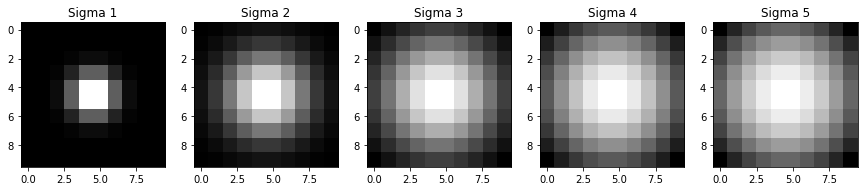

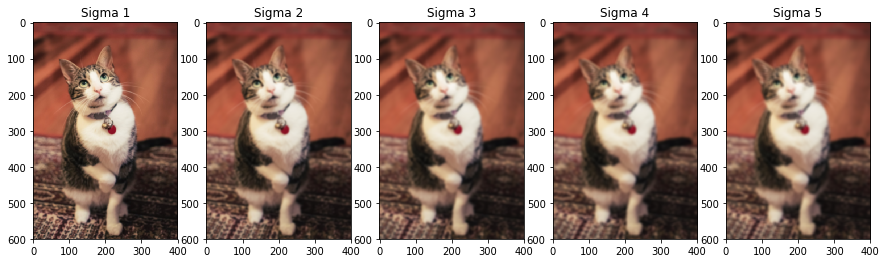

In [0]:
def getGaussKernel2d(ksize, sigma):
  kern = cv2.getGaussianKernel(ksize, sigma)
  return kern@np.transpose(kern)

max_sigma = 6
kernels = list(map(lambda x: getGaussKernel2d(10, x), range(1, max_sigma)))
kernels_titles = list(map(lambda x: "Sigma "+str(x), range(1, max_sigma)))

cat_rgb_small = cv2.resize(cat_rgb, None, fx=.4, fy=.4, interpolation = cv2.INTER_CUBIC)
cats = list(map(lambda kern: cv2.filter2D(cat_rgb_small, -1, kern), kernels))

showInRow(kernels, kernels_titles)
showInRow(cats, kernels_titles)


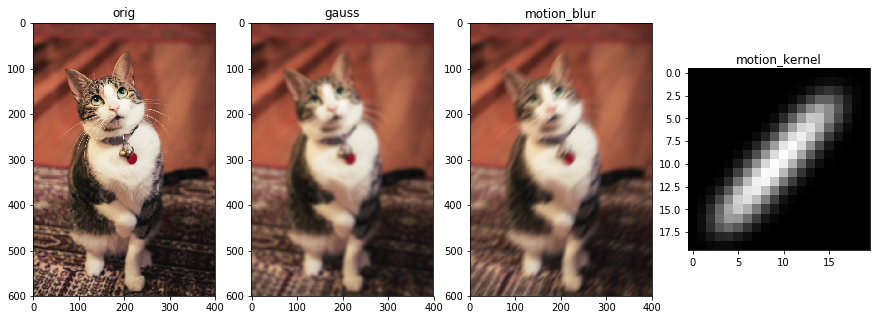

In [0]:
motion_blur_kernel = cv2.imread("motion_blur.png", cv2.IMREAD_GRAYSCALE).astype("float32")
motion_blur_kernel /= np.sum(motion_blur_kernel)
blured_cat = cv2.filter2D(cat_rgb_small, -1, motion_blur_kernel)


showInRow([cat_rgb_small, cats[-1], blured_cat, motion_blur_kernel], 
         ['orig', 'gauss', 'motion_blur', 'motion_kernel'])

For more info you can read [tutorial](https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/) and [official doc](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html)

# Geometric Operation

Matrix multiplication is cool tool for performing some transformations. Let's try to rotate some points in space.

Draw poinst shape:  (83, 2)


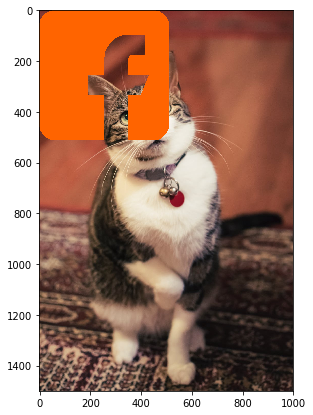

In [0]:
draw_img = cat_rgb.copy()
draw_points = np.array([448, 0, 64, 0, 56.799485, 0.402227294, 50.0464203, 1.53134588, 43.003465, 3.535751, 38.2365324, 5.41401396, 32.19104, 8.4756869, 26.4792023, 12.1766262, 20.8123088, 16.8037307, 14.0927529, 23.971363, 8.40905032, 32.3072094, 4.47882623, 40.4695357, 1.39670977, 50.6642979, 0, 64, 0, 448, 0.743796356, 457.768673, 2.25672551, 464.876462, 4.16563071, 470.724826, 6.23342586, 475.545309, 9.42605378, 481.407584, 12.7170411, 486.254256, 16.3860076, 490.727129, 20.2376443, 494.66354, 24.4347004, 498.276095, 28.4415747, 501.19292, 31.1849963, 502.933572, 37.0206819, 506.034075, 42.206129, 508.180702, 45.7706418, 509.357045, 49.3691605, 510.313646, 52.8231075, 511.023531, 58.1795408, 511.737777, 64, 512, 256, 512, 256, 336, 192, 336, 192, 256, 256, 256, 256, 192, 257.168188, 176.977863, 261.44511, 160.046241, 270.636521, 141.021392, 280.767887, 127.636945, 293.210926, 116.097677, 308.441704, 106.425887, 328.646761, 98.8597109, 352, 96, 416, 96, 416, 176, 384, 176, 370.885893, 176.039201, 363.640318, 176.804097, 356.932728, 179.552274, 354.021345, 182.825421, 352, 192, 352, 256, 432, 256, 400, 336, 352, 336, 352, 512, 448, 512, 462.205434, 510.411922, 468.771088, 508.542259, 475.791694, 505.647993, 482.645512, 501.793895, 489.632797, 496.574879, 496.698752, 489.488035, 502.197105, 482.013446, 506.120185, 474.794008, 508.843248, 467.874234, 511.129694, 458.558538, 512, 448, 512, 64, 510.128977, 48.6035328, 507.25648, 39.8128283, 502.76988, 30.9134767, 496.806058, 22.6380682, 492.9045, 18.4348894, 487.749432, 13.8696543, 479.388685, 8.2361349, 473.266573, 5.19723482, 467.246181, 2.95477855, 458.007097, 0.780911982], dtype='float32')
draw_points = draw_points.reshape((-1, 2))

# fillPoly requries dtype = `int` 
draw_points = np.round(draw_points).astype('int')

print("Draw poinst shape: ", draw_points.shape)
cv2.fillPoly(draw_img, [draw_points], (255, 100, 0))
plt.imshow(draw_img)
plt.show()

Rotated shape: (1, 83, 2)


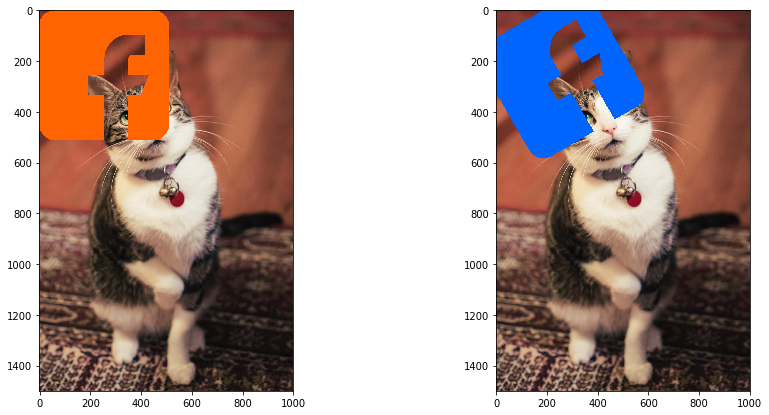

In [0]:

# cv2.getRotationMatrix2D(center_pos, angle_in_degree, scale)
M = cv2.getRotationMatrix2D((256,256),30,1)
draw_points2 = cv2.transform(np.array([draw_points], np.int32), M) # requeries ndim=3
print("Rotated shape:", draw_points2.shape)
draw_img2 = cat_rgb.copy()

cv2.fillPoly(draw_img2, draw_points2, (0, 100, 255))
showInRow([draw_img, draw_img2])

### How it works
![alt text](https://people.gnome.org/~mathieu/libart/art-affine-matrix.png)

In [0]:
# lets see what inside rotation matrix

print("Rotation with translate\n", M)
print("Rotation\n",cv2.getRotationMatrix2D((0,0), 30, 1))
print("Scale\n",cv2.getRotationMatrix2D((0,0), 0, 5))
print("Rotation with zero scale\n",cv2.getRotationMatrix2D((0,0), 30, 0))

Rotation with translate
 [[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]
Rotation
 [[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]
Scale
 [[ 5.  0. -0.]
 [-0.  5.  0.]]
Rotation with zero scale
 [[ 0.  0.  0.]
 [-0.  0.  0.]]


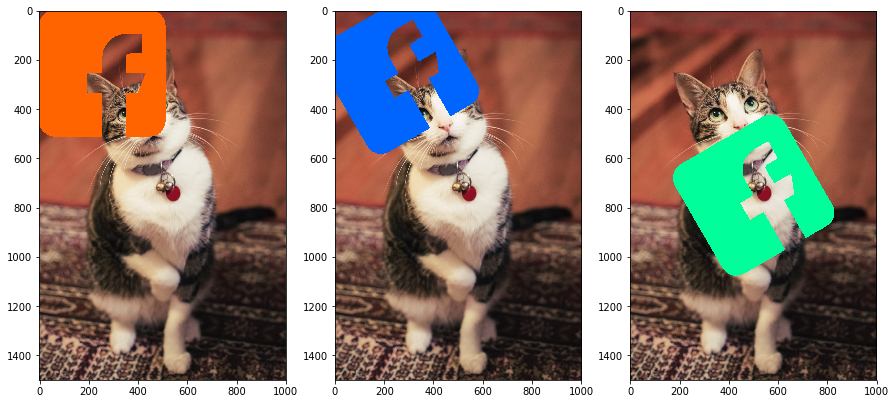

In [0]:
# lets combine several transforms together

cat_center = cat_rgb.shape[:2]
cat_center = (cat_center[0] / 2, cat_center[1] / 2)
M_translate = np.float32([[1,0,cat_center[1] - 256],
                          [0,1,cat_center[0] - 256]]) # there no opencv function

M_rotate = M.copy()
draw_points3 = cv2.transform(np.array([draw_points], np.int32), M_rotate) # requeries ndim=3
draw_points3 = cv2.transform(np.array(draw_points3, np.int32), M_translate) # requeries ndim=3

draw_img3 = cat_rgb.copy()

cv2.fillPoly(draw_img3, draw_points3, (0, 255, 155))
showInRow([draw_img, draw_img2, draw_img3])

But this is not true way for performing operation in sequence. With matrix transformation we can translate and rotate points in 1 operation.

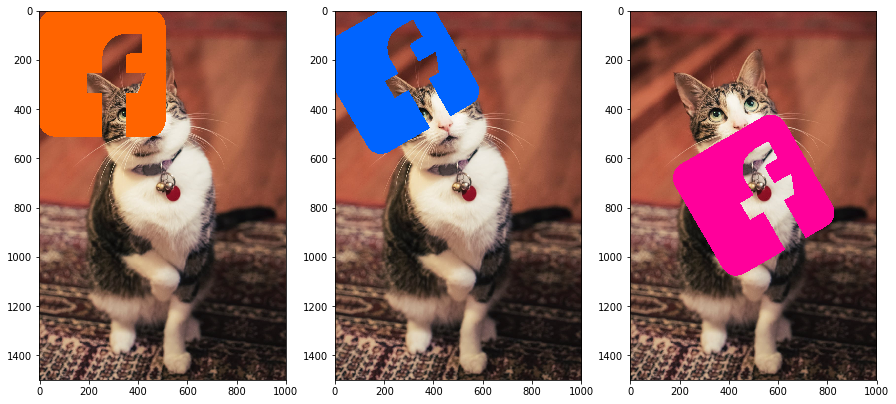

In [0]:
def combineAffine(a, b):
  aa = np.vstack((a,[0, 0, 1]))
  bb = np.vstack((b,[0, 0, 1]))
  return np.dot(aa, bb)[:2]

M_combined = combineAffine(M_rotate, M_translate)

draw_points4 = cv2.transform(np.array([draw_points], np.int32), M_combined) # requeries ndim=3
draw_img4 = cat_rgb.copy()

cv2.fillPoly(draw_img4, draw_points4, (255, 0, 155))
showInRow([draw_img, draw_img2, draw_img4])

# seams we get wrong points position, change order of transformations and explain why

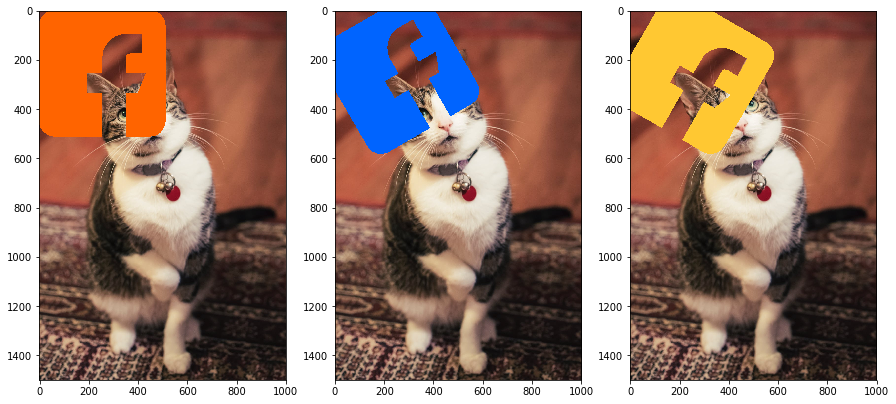

In [0]:
# also we can invert transformation
M_rotate_inv = cv2.invertAffineTransform(M_rotate)
draw_points5 = cv2.transform(np.array([draw_points], np.int32), M_rotate_inv) # requeries ndim=3
draw_img5 = cat_rgb.copy()

cv2.fillPoly(draw_img5, draw_points5, (255, 200, 50))
showInRow([draw_img, draw_img2, draw_img5])

### Exercise
Put logo on right bottom position of cat image and scale down twice. Size of the logo (512, 512). If it easy for you, additionaly rotate logo by 180º.

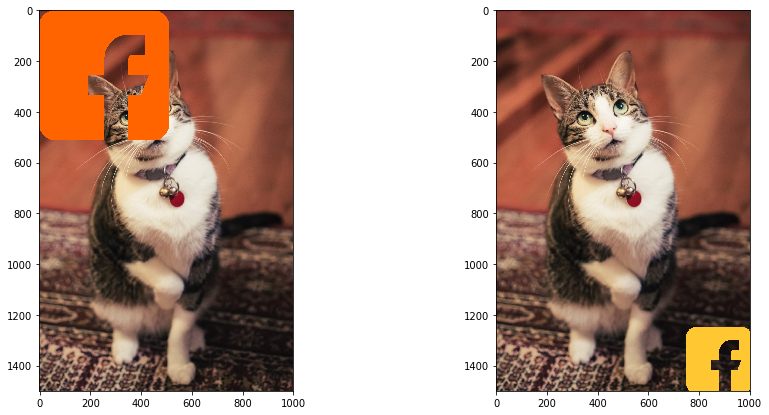

In [0]:
M_translate = np.float32([[0.5,0,cat_center[1]+250 ],
                          [0,0.5,cat_center[0]+500 ]])
draw_points6 = cv2.transform(np.array([draw_points], np.int32), M_translate) # requeries ndim=3
draw_img6 = cat_rgb.copy()

cv2.fillPoly(draw_img6, draw_points6, (255, 200, 50))
showInRow([draw_img, draw_img6])

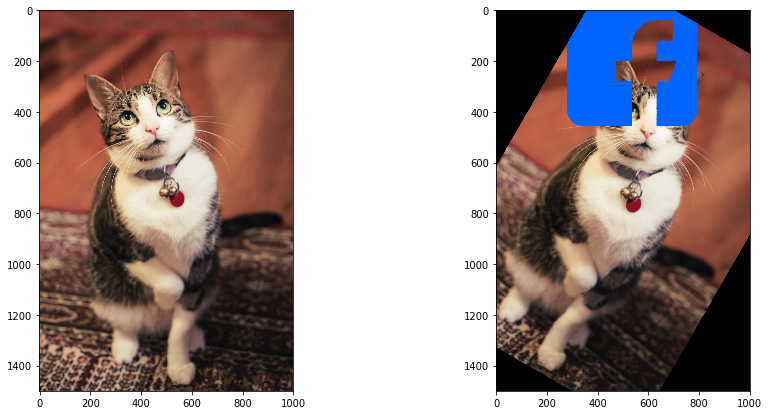

In [0]:
# this also works with images
M = cv2.getRotationMatrix2D((draw_img2.shape[1]/2, draw_img2.shape[0]/2), -30, 1)
cat_rgb_rotated = cv2.warpAffine(draw_img2, M, (draw_img2.shape[1], draw_img2.shape[0]))

showInRow([cat_rgb, cat_rgb_rotated])